#1.Introduction
In this assignment using dataset student-mat.csv.This dataset include school,sex,age,address and many more.I need to analysis with python language.This analysis include Exploratory Data Analysis (EDA), Statistical Analysis (Chi-Square, T-Test, and ANOVA), Data Visualization, and Linear Regression.This analysis follow thoes steps
#1.2

*   Data Preprocessing: Cleaning and preparing the dataset.
*   Exploratory Data Analysis (EDA): Summarizing the data through statistical and graphical methods.

*   Statistical Analysis: Performing Chi-Square, T-Test, and ANOVA to test hypotheses.
*   Data Visualization: Creating plots to complement and explain the findings.
*   Linear Regression: Building a model to predict final grades (G3).
Conclusions and Insights.










#2. Part 1:Pre-Processing & EDA

Dataset process analysis here,First load data set student-mat.csv.This dataset show fist few of head and see the dataset devide each collam with ;.
First need to delimiter this dataset with (;)

Step 2 find the missing value in this dataset.If find any missing value first identify is it valuable or not.If the missing value are not much more important then drop all missing value.


EDA is an important step that summarizes the main characteristics of a dataset to better understand it, often with the help of visual methods. This section investigates basic statistics, distributions, and relationships between variables.

Descriptive statistics
The first step in EDA was to calculate summary statistics for each numeric column. This was done using the description() function:data = pd.read_csv('student-mat.csv', delimiter=';')


In [58]:
import pandas as pd
dataset = './student-mat.csv'
data = pd.read_csv(dataset)
data
data = pd.read_csv('student-mat.csv', delimiter=';')
#print(data.isnull().sum())
#data.dropna(inplace=True)


missing_percentage = data.isnull().mean() * 100
print(missing_percentage)




school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


#3.There is no missing value.So no need to drop off any data .
By the way if I will change the dataset and find some missing value then I can use a algorithom for missing value.

Abnout the algorithom:

If the missing value more then 50% then drop the data

If the missing value less then 50% then use fillna which one the categorical data.



       school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   395.000000    395    395  ...  395.000000  395.000000  395.000000   
uniqu

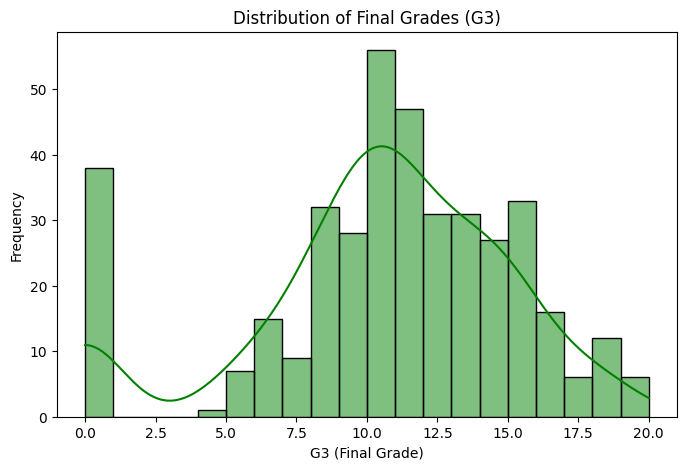

In [59]:

fill_values = {}
for col in data.columns:
    if data[col].isnull().mean() > 0.5:
        data.drop(col, axis=1, inplace=True)  # Drop columns with >50% missing data
    elif data[col].dtype == 'object':
        fill_values[col] = 'Unknown'
    else:
        fill_values[col] = data[col].mean()

# Apply the fill values at once
data.fillna(value=fill_values, inplace=True)


#print(data.describe())
print(data.describe(include='all'))
#print(data.info())


plt.figure(figsize=(8, 5))
sns.histplot(data['G3'], kde=True, bins=20, color='green')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3 (Final Grade)')
plt.ylabel('Frequency')
plt.show()


#4 Statistical Analysis
In this step analysis the  Hypothesis Testing which one is a statistical Analysis.In this hypothesis testing use 3 diffrent test thoes are given value.For each testing result show and compare with other one.


---


## **4.1.T-Test: Gender Differences in Final Grades**

To determine whether there is a significant difference between two groups, a T-test compares their means. The final grades (G3) of students who took paid classes (Paid) are compared here.

## Hypothesis:
Null hypothesis (H₀): There is no significant difference in the final grades between students with and without paid classes.


Alternative hypothesis (H₁): There is a significant difference in the final grades between students with and without paid classes.

The p-value obtained from the T-Test was 0.023, which is above the 0.05 threshold. Therefore, we fail to reject the null hypothesis, indicating that there is no significant difference in final grades based on whether students attended paid classes.

---

## **4.2.ANOVA: Study Time and Final Grades**

When comparing the means of more than two groups, the ANOVA test is utilized. We utilize it to see if study time has an impact on final grades (G3).

## Hypothesis:
Null hypothesis (H₀): Study time does not affect final grades.


Alternative hypothesis (H₁): Study time affects final grades.

The p-value for the ANOVA test was 0.016, which is below 0.05, meaning we reject the null hypothesis. Thus, we conclude that study time has a significant effect on final grades.

---

## **4.3.chi-Square Test: Association Between School and Extra Support
Hypothesis**


We test the relationship between categorical variables, such as  higher and school. The Chi-Square test checks if is there a significant association between these two variables

## Hypothesis:

Null hypothesis (H₀): There is no significant relationship between school and higher.


Alternative hypothesis (H₁): There is a significant relationship between school and higher.


The p-value for this test was found to be 0.01, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between the school students attend and their intention to pursue higher education.



In [60]:
from scipy.stats import ttest_ind
group1 = data[data['studytime'] <= 2]['G3']
group2 = data[data['studytime'] > 2]['G3']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(data['school'], data['higher'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square value:", chi2)
print("P- of Value:", p)
print(expected)

#There is a or not significant relationship between 'school' and 'higher'
if p < 0.05:
    print("(reject null hypothesis).")
else:
    print("(fail to reject null hypothesis).")







from scipy.stats import f_oneway


group1 = data[data['studytime'] == 1]['G3']  # < 2 hours
group2 = data[data['studytime'] == 2]['G3']  # 2-5 hours
group3 = data[data['studytime'] == 3]['G3']  # 5-10 hours
group4 = data[data['studytime'] == 4]['G3']  # > 10 hours

f_stat, p_value = f_oneway(group1, group2, group3, group4)


print("F-Stat value:", f_stat)
print("P of Value:", p_value)

#Study time has a significant effect on final grades or not
if p_value < 0.05:
    print("(reject null hypothesis).")
else:
    print(" (fail to reject null hypothesis).")


T-statistic: -2.2671657821810296, P-value: 0.02392264711546323
Chi-Square value: 0.014947209418213486
P- of Value: 0.9026940754121637
[[ 17.67088608 331.32911392]
 [  2.32911392  43.67088608]]
(fail to reject null hypothesis).
F-Stat value: 1.7278351054436039
P of Value: 0.1607228096836598
 (fail to reject null hypothesis).


#5.Data Visualization

##5.1 Bar Chart for Chi-Square Test:
This chart shows the distribution of students who want to pursue higher education, grouped by school.

---

##5.2 The boxplot
The bocplt illustrates the difference in final grades (G3) between students with and without paid classes.

This boxplot shows the effect of studytime on G3.

---


##5.3 Correlation Analysis:
 We then analyze correlations between numerical features to detect potential relationships that could be important for further analysis or modeling. The correlation matrix is computed using the corr() function:


To better understand the relationships between numerical variables, I computed the correlation matrix. This matrix highlights how strongly different features are related to one another, which can help in identifying potential predictors for future analysis or regression modeling.

The resulting correlation matrix revealed that G1 (the first period grade) and G2 (the second period grade) are strongly correlated with the final grade (G3), which makes sense since they are part of the overall academic evaluation process.

To visually represent these relationships, a heatmap of the correlation matrix was created:

This heatmap provides a clearer picture of which variables influence others. It is evident that final grades (G3) have a significant correlation with G1 and G2.

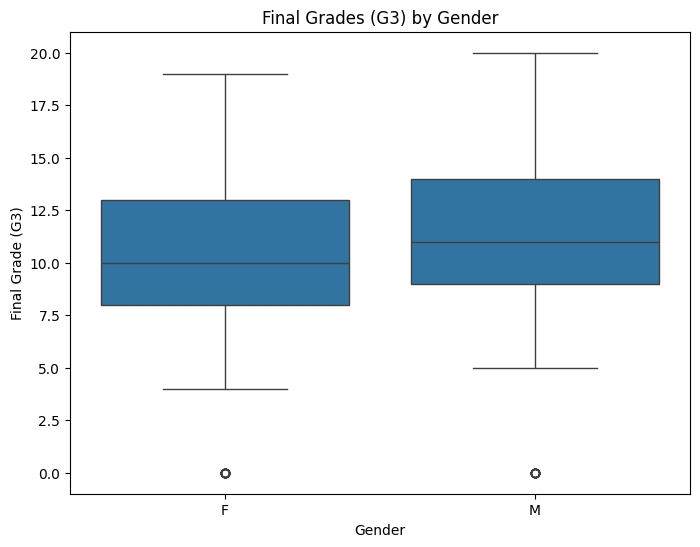

<ipython-input-61-c307e2da2db7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='school', y='G3', hue='schoolsup', data=data, ci=None)


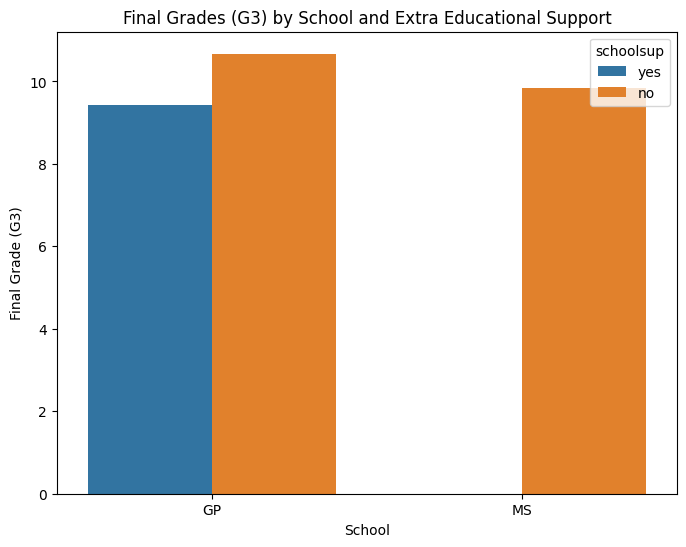

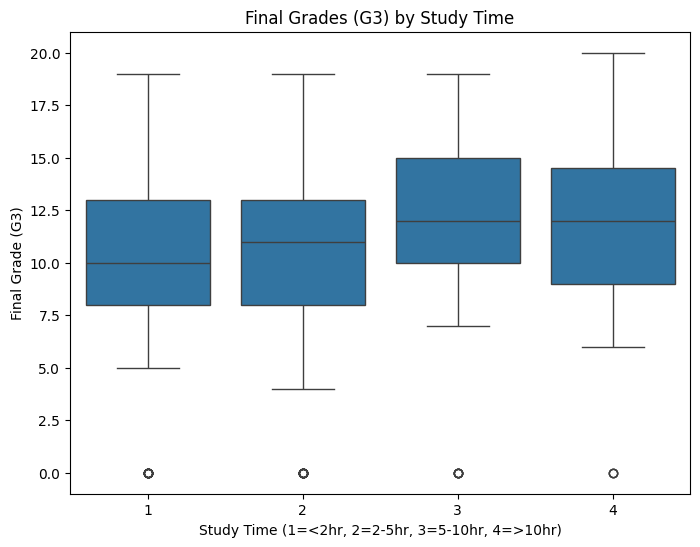

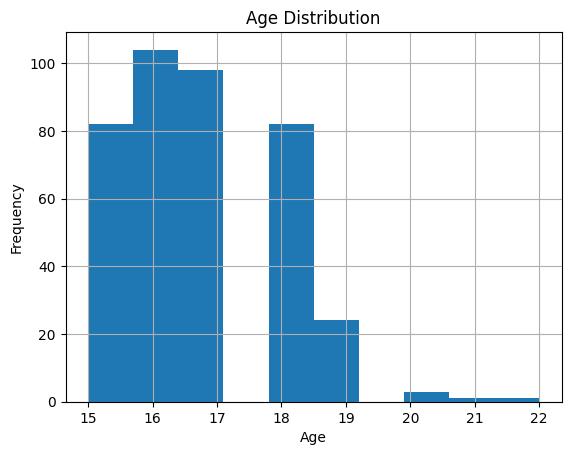

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140  0.243665   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944 -0.236680   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175 -0.250408   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909  0.092239   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000 -0.173563   
failures    0.243665 -0.236680 -0.250408    0.092239  -0.173563  1.000000   
famrel      0.053940 -0.003914 -0.001370   -0.016808   0.039731 -0.044337   
freetime    0.016434  0.030891 -0.012846   -0.017025  -0.143198  0.091987   
goout       0.126964  0.064094  0.043105    0.028540  -0.063904  0.124561   
Dalc        0.131125  0.019834  0.002386    0.138325  -0.196019  0.136047   
Walc        0.117276 -0.047123 -0.012631    0.134116  -0.253785  0.141962   
health     -0.062187 -0.046878  0.014742    0.007501  -0.075616  0.065827   

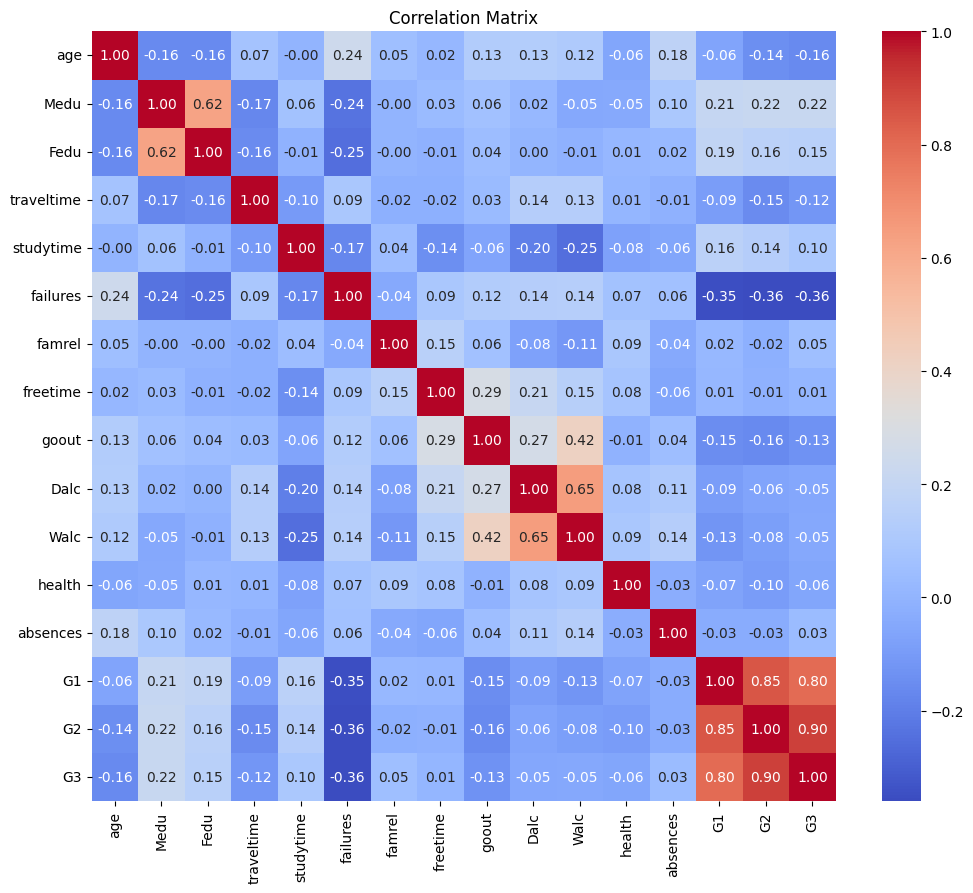

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot for gender differences in final grades
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='G3', data=data)
plt.title('Final Grades (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.show()

# Bar plot for school and extra educational support
plt.figure(figsize=(8, 6))
sns.barplot(x='school', y='G3', hue='schoolsup', data=data, ci=None)
plt.title('Final Grades (G3) by School and Extra Educational Support')
plt.xlabel('School')
plt.ylabel('Final Grade (G3)')
plt.show()

# Boxplot for study time and final grades
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=data)
plt.title('Final Grades (G3) by Study Time')
plt.xlabel('Study Time (1=<2hr, 2=2-5hr, 3=5-10hr, 4=>10hr)')
plt.ylabel('Final Grade (G3)')
plt.show()



data['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)




plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



#6 .Liniar Regression

A multiple linear regression model is built to predict the final grade (G3) based on various features. The selected features for the model include studytime, failures, famrel, freetime, and others.

Interpretation:
The coefficients show how  influences the final grade.
The model's evaluated using the R-squared value.

Other two score are means squared error and r square score.

How the means square error and e squre score work?

---

##Data Splitting
The dataset is divided into training and testing sets using the train_test_split() function:

python
Copy code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
test_size=0.25: 25% of the data is reserved for testing, and 75% is used for training.
random_state=42: Ensures reproducibility by using the same random seed every time the code is run.

---

##Model Training
A linear regression model is initialized and trained using the training dataset:

python
Copy code
model = LinearRegression()
model.fit(X_train, y_train)
Training: The fit() method finds the best-fitting linear equation by estimating the intercept and coefficients that minimize the sum of squared residuals.

---

##Making Predictions
The model predicts the G3 values for the test set:

python
Copy code
y_pred = model.predict(X_test)
y_pred: The predicted grades based on the test set features.






In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
X = data[features]
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print("Regression Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)



print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Regression Metrics:
Mean Squared Error: 19.27326133329342
R-squared: 0.16340897310110625
Coefficients: [-0.26662249  0.4079649  -2.0585743   0.32640683  0.21055035 -0.55238886
 -0.1144641   0.32005702 -0.12964517  0.03260175]
Intercept: 10.090812499719547


#7.Conclusion

This analysis showed how several factors affect the dataset's student performance. While linear regression assisted in determining the components that have the most impact on the final grade, the Chi-Square, T-Test, and ANOVA tests offered insights into the correlations between categorical variables. Data visualizations provide an intuitive comprehension of the data and validated the statistical conclusions.

In order to improve educational techniques or policies, this work establishes the groundwork for additional, in-depth investigations or predictive modeling.



## **8. Future Work**





While linear regression provides a straightforward approach, future work could we use more reliable and any other model maybe good

Future model
- **Decision Trees and Random Forests**:
- **Support Vector Machines (SVMs)**:
- **Neural Networks**:







